<a href="https://colab.research.google.com/github/Uriel1024/Machine-learning/blob/main/practica_6/practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_digits, load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import struct
import re
import string

In [ ]:
RANDOM_STATE = 42

In [ ]:
kneighbors = KNeighborsClassifier()
svc = SVC(random_state = RANDOM_STATE)
linear_svc = LinearSVC(random_state = RANDOM_STATE)
nu_svc = NuSVC(random_state = RANDOM_STATE)
decision_tree = DecisionTreeClassifier(random_state = RANDOM_STATE)
random_forest = RandomForestClassifier(random_state = RANDOM_STATE)
ada_boost = AdaBoostClassifier(random_state = RANDOM_STATE)
gradient_boosting = GradientBoostingClassifier(random_state = RANDOM_STATE)
gaussian_nb = GaussianNB()
mlp = MLPClassifier(random_state = RANDOM_STATE)


Funcion para mostrar las matrices de confusion

In [ ]:
def plot_confusion_matrix(matrix_conf):
  clasificadores = ["KNeighborsClassifier", "SVC", "LinearSVC", "NuSVC", "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "GaussianNB", "MLPClassifier"]

  for i ,model_name in enumerate(clasificadores):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix_conf[i], display_labels=data.target_names)
    disp.plot(cmap=plt.cm.Blues, values_format='g')
    plt.title(f"Matriz de confusion para el modelo: {model_name}")
    plt.show()


In [ ]:
def plot_confusion_matrix1(matrix_conf, labels):
  clasificadores = ["KNeighborsClassifier", "SVC", "LinearSVC", "NuSVC", "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "GaussianNB", "MLPClassifier"]

  for i ,model_name in enumerate(clasificadores):
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix_conf[i], display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, values_format='g')
    plt.title(f"Matriz de confusion para el modelo: {model_name}")
    plt.show()

# Iris

In [ ]:
data = load_iris()

Solo ploteamos los primeros 3 features debido a que no se pueden representar mas dimensiones.

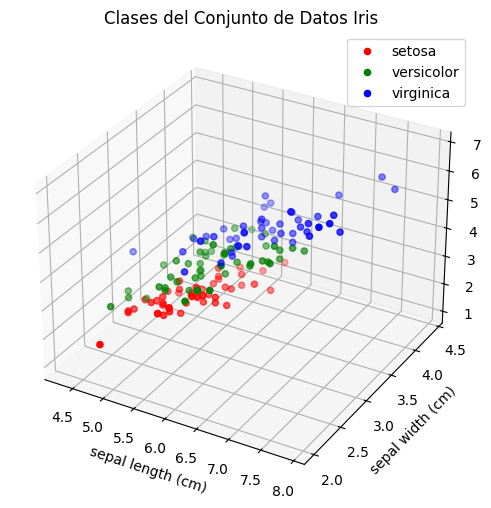

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

clases = data.target_names
colores = ['r', 'g', 'b']

for i, nombre_clase in enumerate(clases):
    indices = np.where(data.target == i)
    ax.scatter(data.data[indices, 0],
               data.data[indices, 1],
               data.data[indices, 2],
               c=colores[i],
               label=nombre_clase,
               marker='o')

ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2])

plt.title("Clases del Conjunto de Datos Iris")
ax.legend()
plt.show()

In [ ]:
X, y = data.data, data.target
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_iris = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] =  [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_iris.append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results

{'kneighbors': [0.9811764705882353, 0.98, 0.98, 0.98],
 'svc': [1.0, 1.0, 1.0, 1.0],
 'linear_svc': [0.9811111111111112, 0.98, 0.979963133640553, 0.98],
 'nu_svc': [1.0, 1.0, 1.0, 1.0],
 'decision_tree': [0.940888888888889, 0.94, 0.9398894009216591, 0.94],
 'random_forest': [0.9811111111111112, 0.98, 0.979963133640553, 0.98],
 'ada_boost': [0.9642105263157894, 0.96, 0.9597777777777778, 0.96],
 'gradient_boosting': [0.9642105263157894, 0.96, 0.9597777777777778, 0.96],
 'gaussian_nb': [0.9811111111111112, 0.98, 0.979963133640553, 0.98],
 'mlp': [0.9811764705882353, 0.98, 0.98, 0.98]}

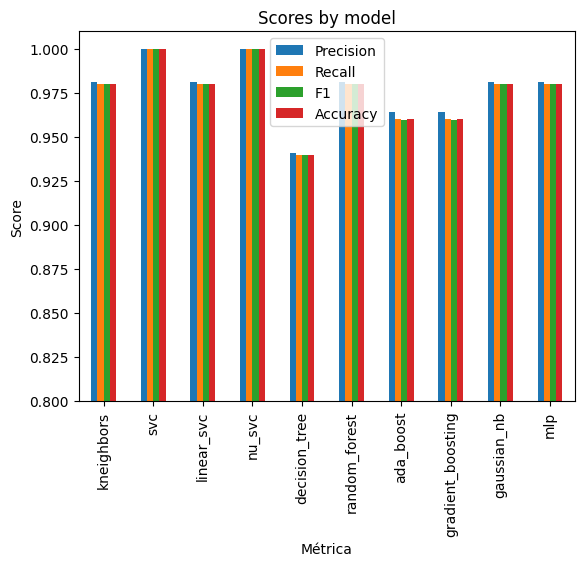

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]
df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.ylim(0.8, 1.01)
plt.title("Scores by model")
plt.show()

Mostramos las matrices de confusion para compararlas

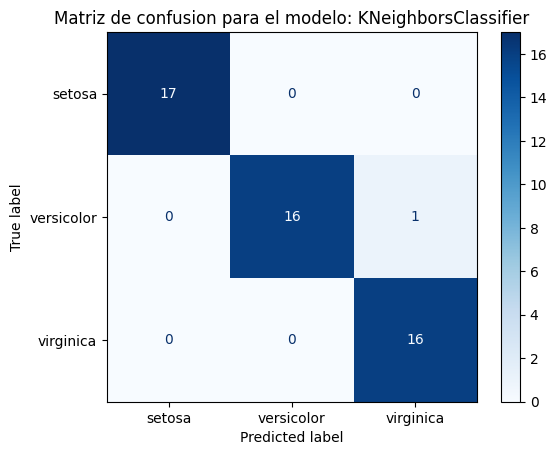

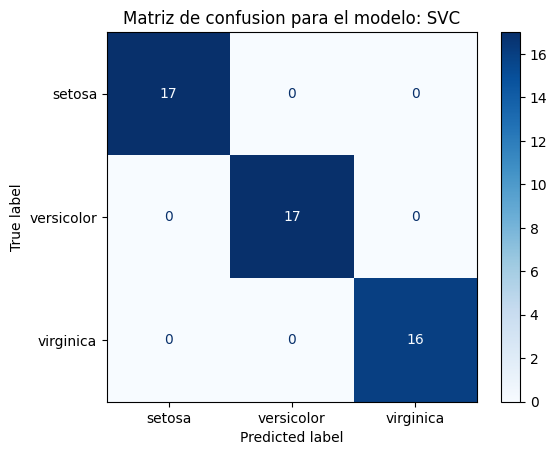

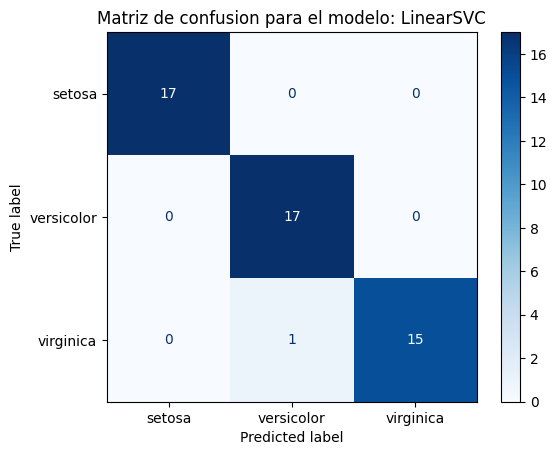

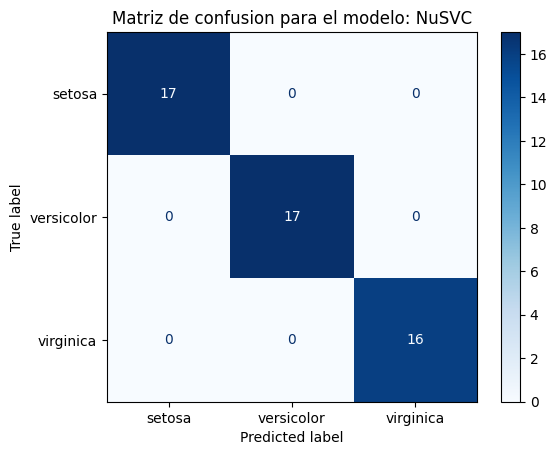

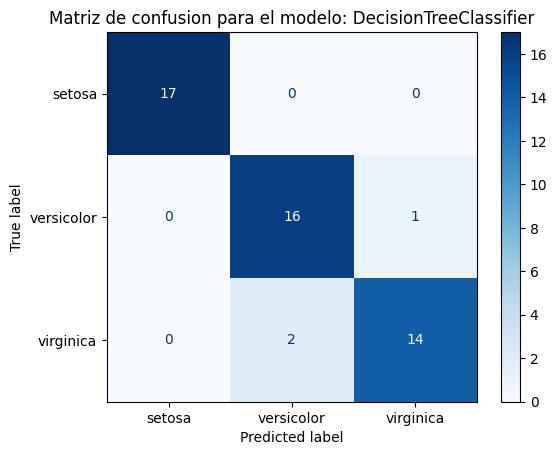

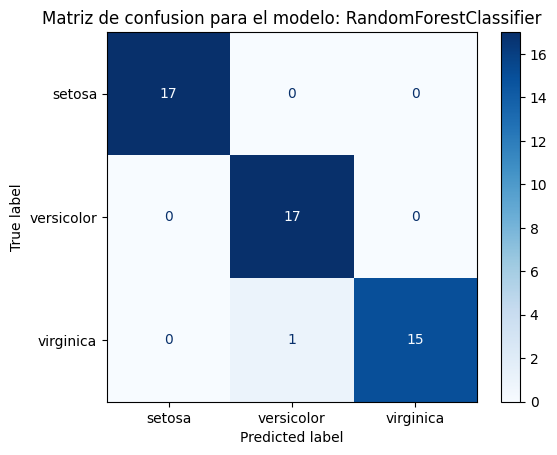

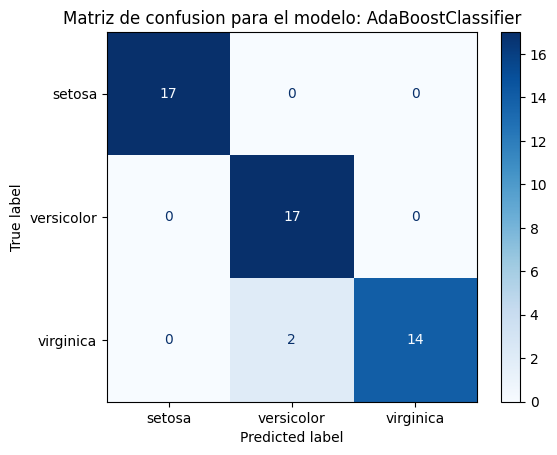

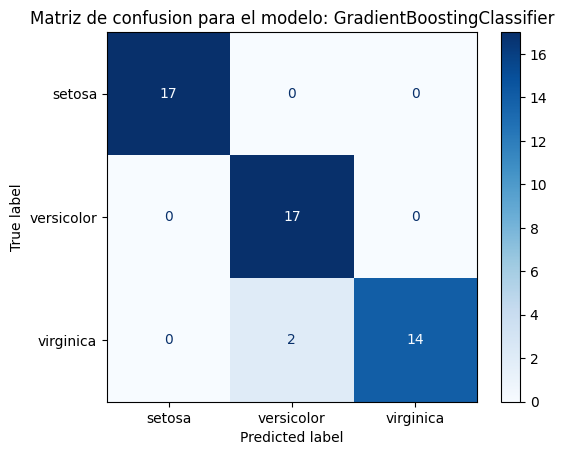

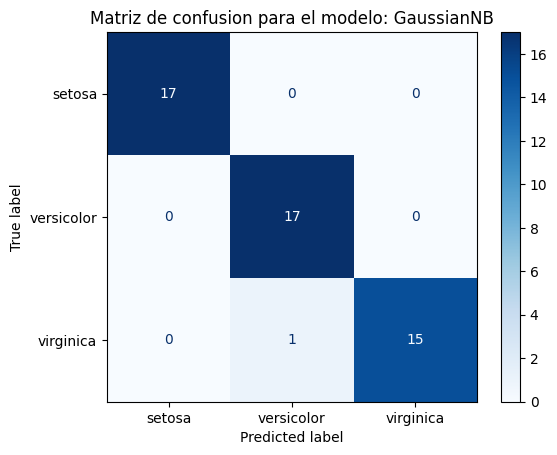

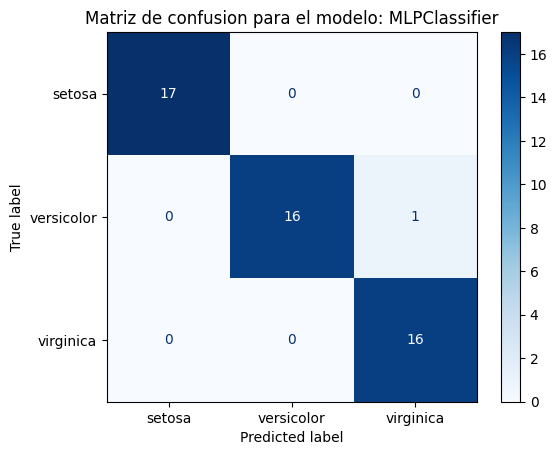

In [ ]:
plot_confusion_matrix1(matrix_iris, data.target_names)

# Digits

In [ ]:
data = load_digits()

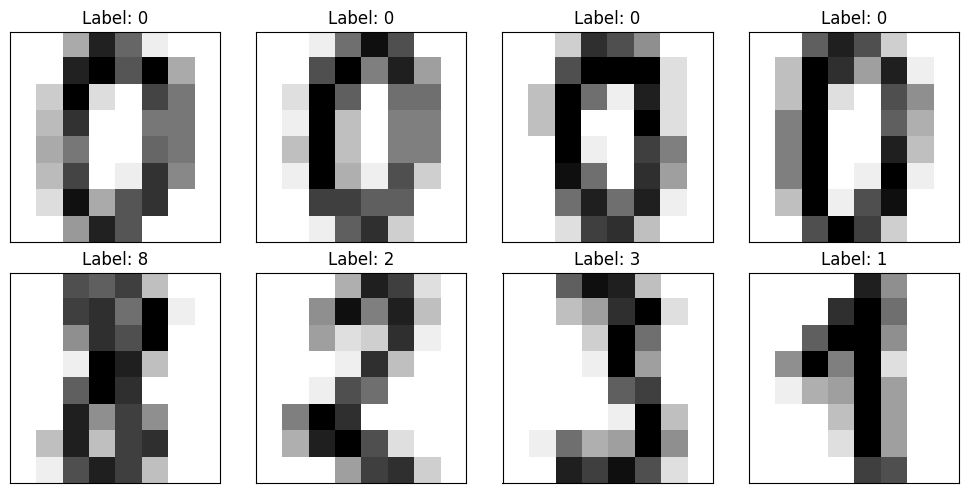

In [ ]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.ravel()

for i, ax in enumerate(axes):
    if i < len(indices):
        image = data.data[indices[i]].reshape((8, 8))
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Label: {data.target[indices[i]]}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

In [ ]:
X, y = data.data, data.target
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_digits = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_digits.append(confusion_matrix(y_test, y_pred))

In [ ]:
results

{'kneighbors': [0.9885817144554515,
  0.9882154882154882,
  0.9881754518221376,
  0.9882154882154882],
 'svc': [0.990095241734586,
  0.98989898989899,
  0.9898959378101013,
  0.98989898989899],
 'linear_svc': [0.9436059582165214,
  0.9427609427609428,
  0.9427159916056738,
  0.9427609427609428],
 'nu_svc': [0.9659877463156151,
  0.9646464646464646,
  0.9647860229423798,
  0.9646464646464646],
 'decision_tree': [0.8752109631386958,
  0.8720538720538721,
  0.8727606578790166,
  0.8720538720538721],
 'random_forest': [0.9769259888044228,
  0.9764309764309764,
  0.9764679373978118,
  0.9764309764309764],
 'ada_boost': [0.7755185953773417,
  0.7087542087542088,
  0.6999774432895657,
  0.7087542087542088],
 'gradient_boosting': [0.9683834742036358,
  0.968013468013468,
  0.9680570102859337,
  0.968013468013468],
 'gaussian_nb': [0.8948033690167478,
  0.8754208754208754,
  0.8783612854153827,
  0.8754208754208754],
 'mlp': [0.9765334305791836,
  0.9764309764309764,
  0.9763079329768432,
  0.9

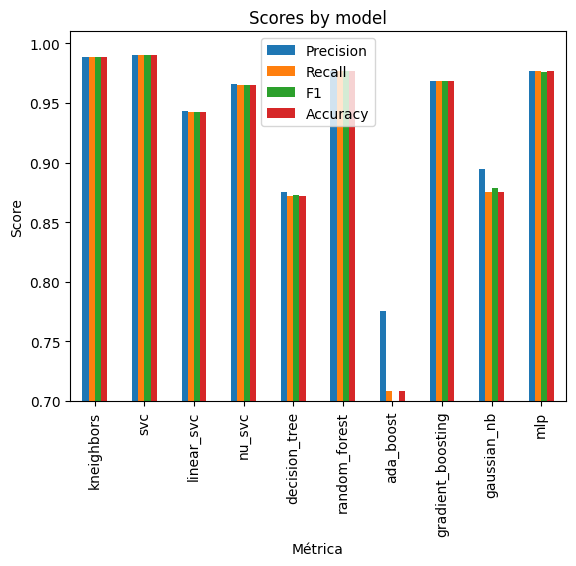

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.ylim(0.7, 1.01)
plt.title("Scores by model")
plt.show()

Se comparan todas las matrices de confusion para el dataset de Digits

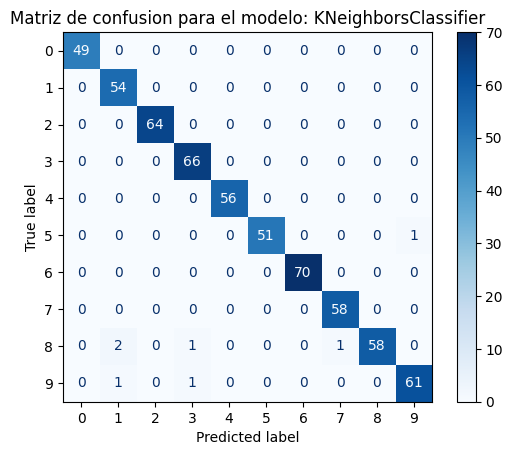

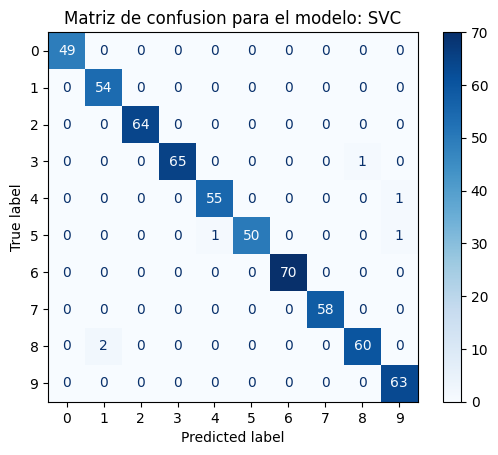

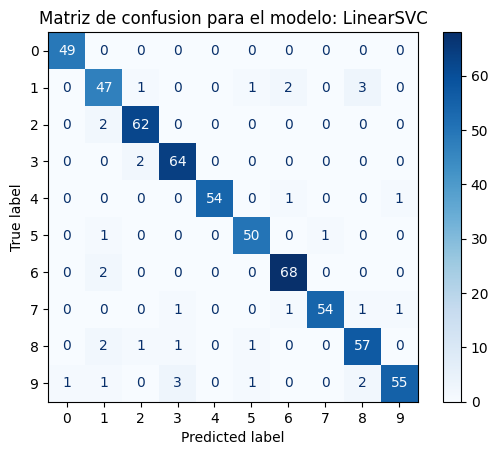

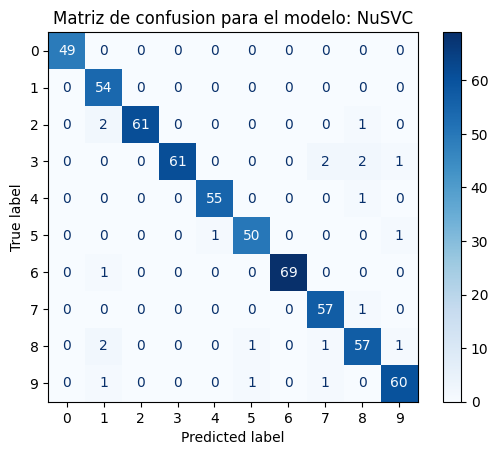

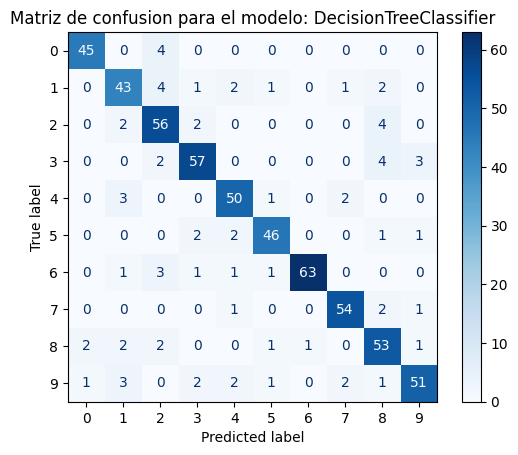

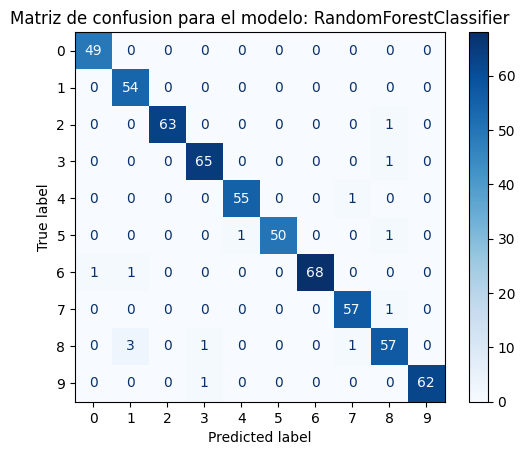

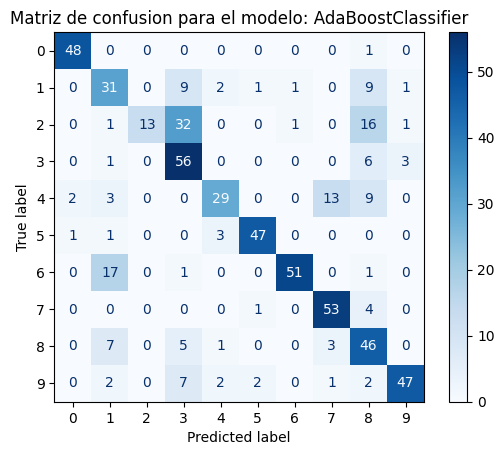

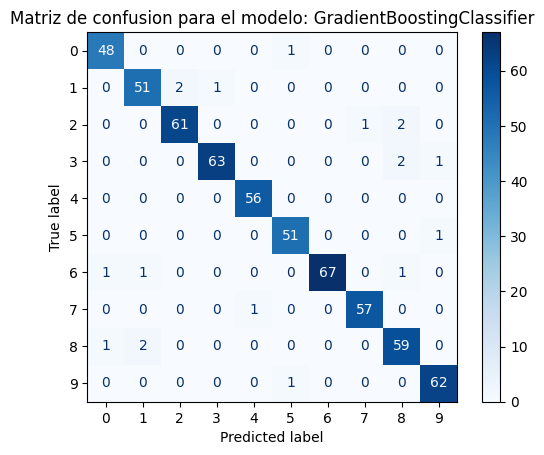

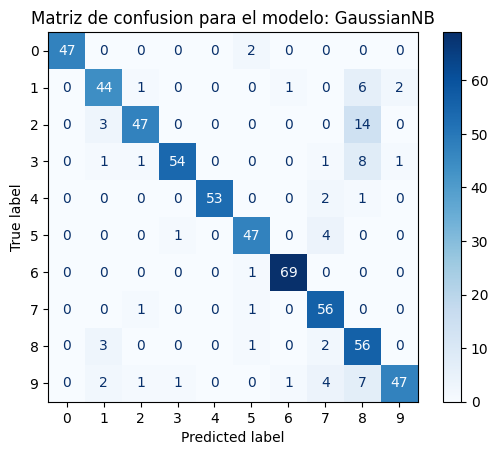

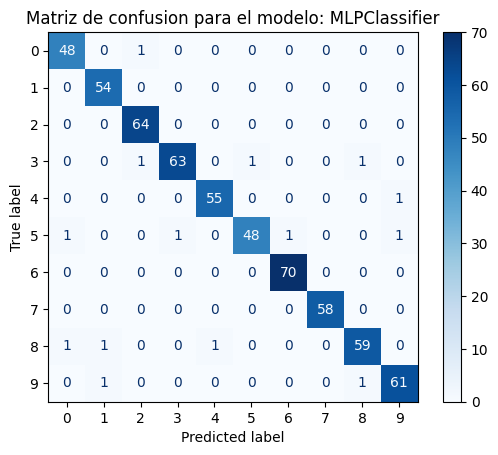

In [ ]:
plot_confusion_matrix(matrix_digits)

# Breast Cancer Wisconsin

In [ ]:
data = load_breast_cancer()

Solo ploteamos los primeros 3 features debido a que no se pueden representar mas dimensiones.

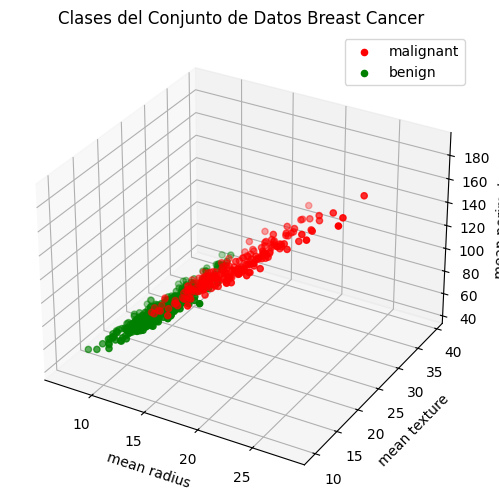

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

clases = data.target_names
colores = ['r', 'g', 'b']

for i, nombre_clase in enumerate(clases):
    indices = np.where(data.target == i)
    ax.scatter(data.data[indices, 0],
               data.data[indices, 1],
               data.data[indices, 2],
               c=colores[i],
               label=nombre_clase,
               marker='o')

ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2])

plt.title("Clases del Conjunto de Datos Breast Cancer")
ax.legend()
plt.show()

In [ ]:
X, y = data.data, data.target
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_breast_cancer = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]

matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_breast_cancer.append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
results

{'kneighbors': [0.9520553032689683,
  0.9521276595744681,
  0.9520630041130452,
  0.9521276595744681],
 'svc': [0.9430681409923756,
  0.9414893617021277,
  0.9408514147249923,
  0.9414893617021277],
 'linear_svc': [0.9840585612236795,
  0.9840425531914894,
  0.9840210013710152,
  0.9840425531914894],
 'nu_svc': [0.9131599684791174,
  0.898936170212766,
  0.8950804441807237,
  0.898936170212766],
 'decision_tree': [0.9310835983931671,
  0.9308510638297872,
  0.9309398354152574,
  0.9308510638297872],
 'random_forest': [0.9680851063829787,
  0.9680851063829787,
  0.9680851063829787,
  0.9680851063829787],
 'ada_boost': [0.9840585612236795,
  0.9840425531914894,
  0.9840210013710152,
  0.9840425531914894],
 'gradient_boosting': [0.979061368199106,
  0.9787234042553191,
  0.978776627425139,
  0.9787234042553191],
 'gaussian_nb': [0.9574416567925402,
  0.9574468085106383,
  0.9573289893937182,
  0.9574468085106383],
 'mlp': [0.9415029656636011,
  0.9414893617021277,
  0.9412403802625622,
  

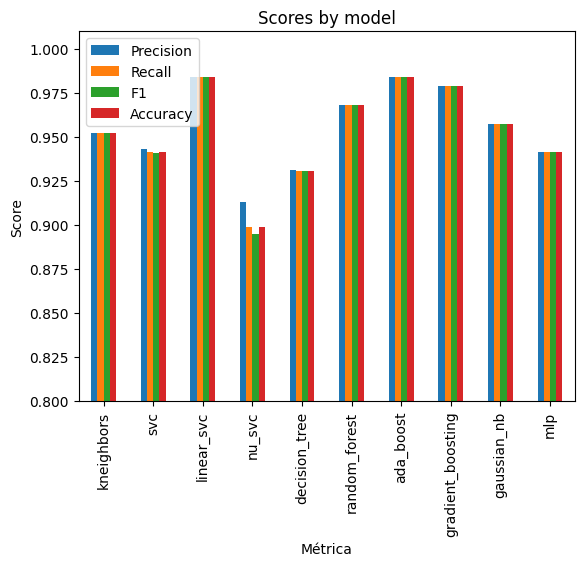

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.ylim(0.8, 1.01)
plt.title("Scores by model")
plt.show()

Se comparan las matrices de confusion del dataset Breast_Cancer


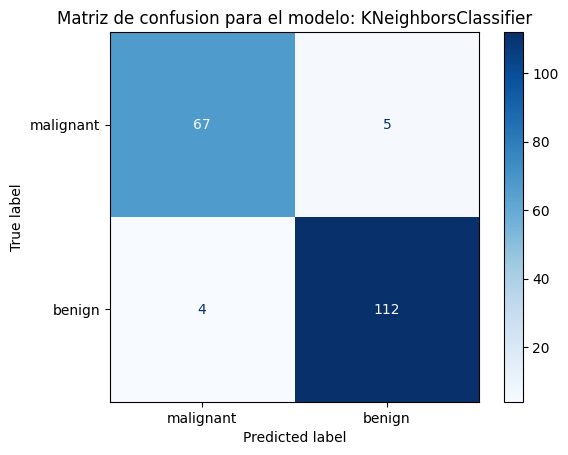

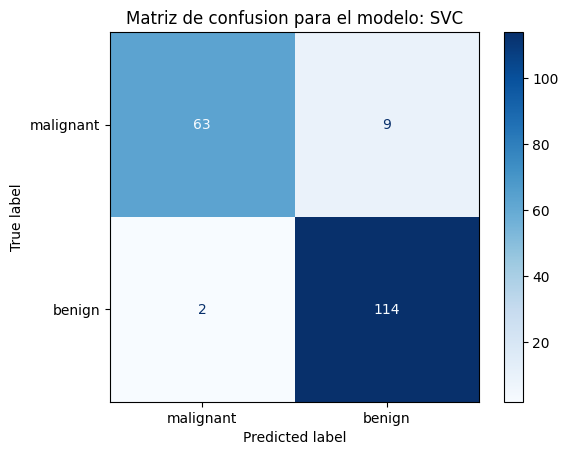

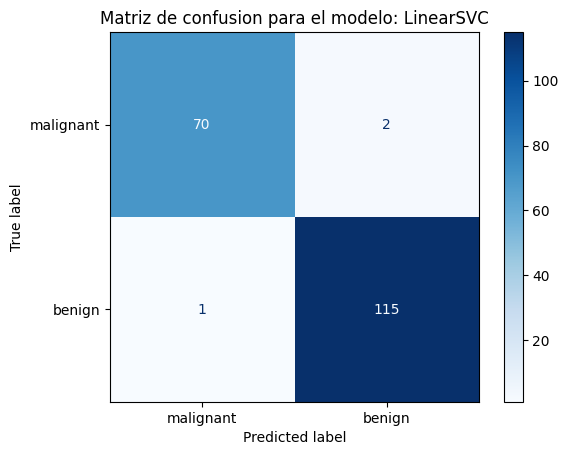

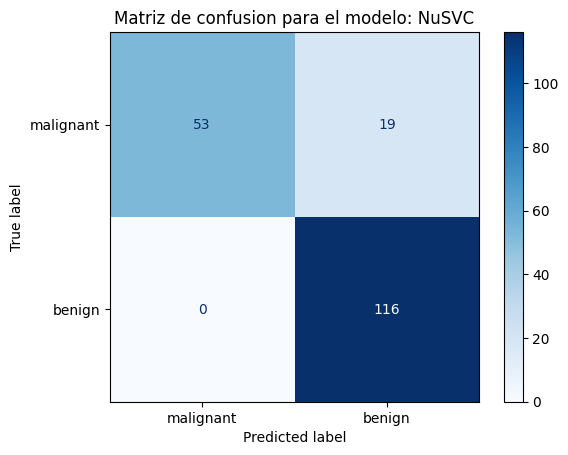

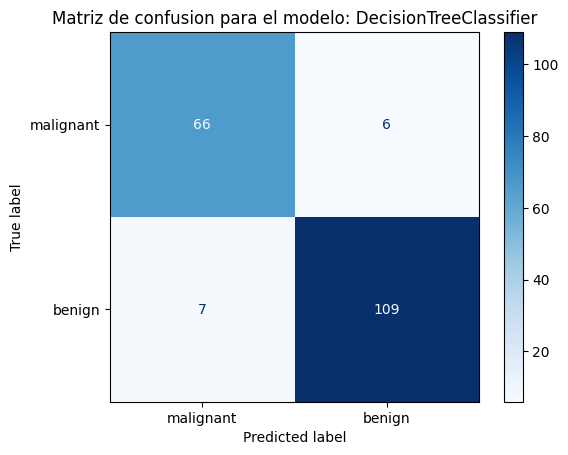

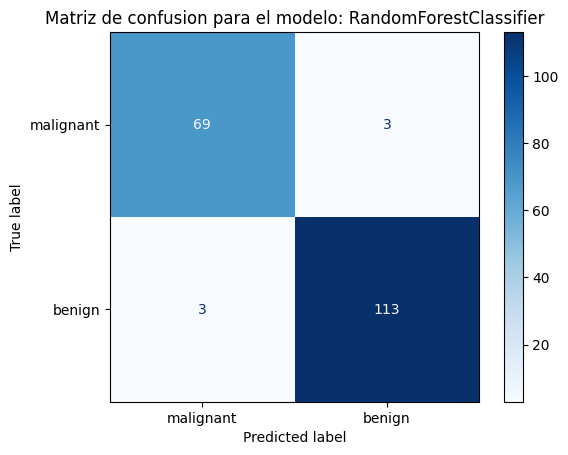

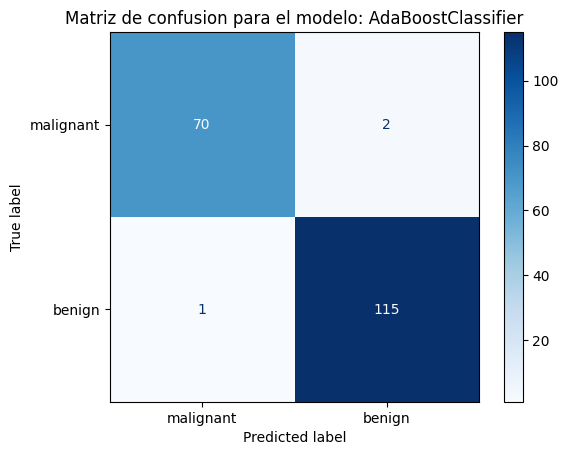

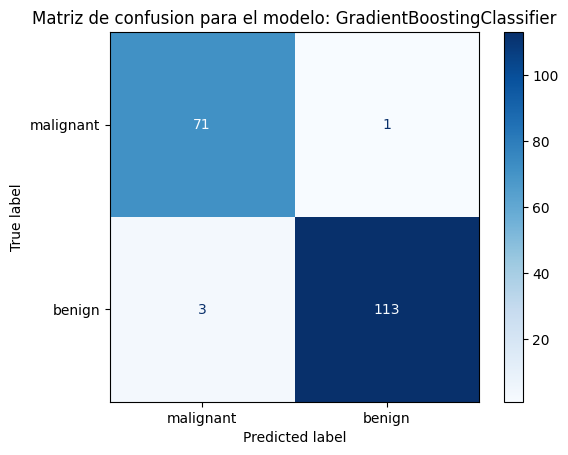

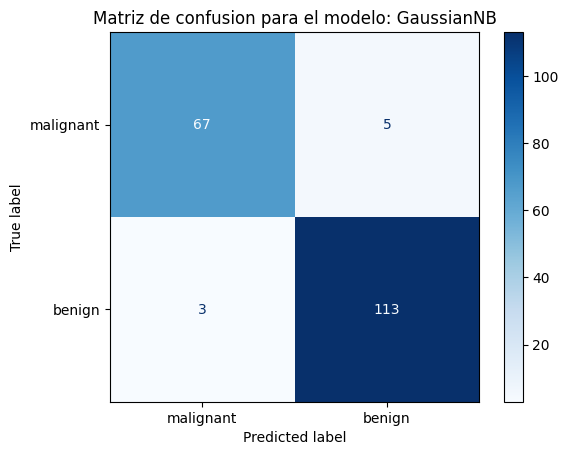

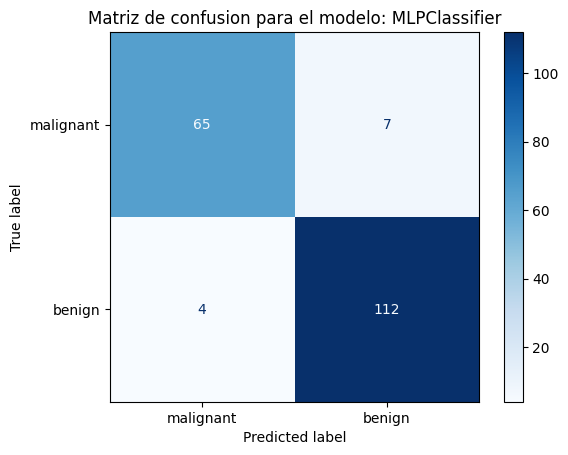

In [ ]:
plot_confusion_matrix(matrix_breast_cancer)

# Heart Disease

In [ ]:
#subi el dataset a google para no tener que estarlo cargando de manera manual cada que se descarga o clona de nuevo el proyecto
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTY-qdxuY-XTMP8_svbSzsBJGTa8AlC2Qumq0j3JXEk2-sLxwcwlAh6F1D2OpjS9iK1HRDZfA1pSRqt/pub?gid=1675467064&single=true&output=csv"

data = pd.read_csv(path)

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Solo ploteamos los primeros 3 features debido a que no se pueden representar mas dimensiones.

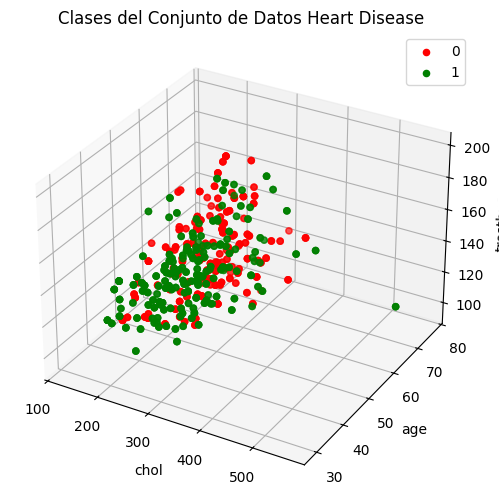

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

clases = data["target"].unique()
colores = ['r', 'g', 'b']

for i, nombre_clase in enumerate(clases):
    indices = np.where(data["target"] == i)[0]
    ax.scatter(data.iloc[indices, 4],
               data.iloc[indices, 0],
               data.iloc[indices, 3],
               c=colores[i],
               label=nombre_clase,
               marker='o')

ax.set_xlabel(data.columns[4])
ax.set_ylabel(data.columns[0])
ax.set_zlabel(data.columns[3])

plt.title("Clases del Conjunto de Datos Heart Disease")
ax.legend()
plt.show()

In [ ]:
X, y = data.drop("target", axis=1), data["target"]
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_heart_disease = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]

matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
matrix_heart_disease.append(confusion_matrix(y_test, y_pred))

In [ ]:
results

{'kneighbors': [0.759085783864545,
  0.7522123893805309,
  0.7518500006471227,
  0.7522123893805309],
 'svc': [0.6729114119206931,
  0.672566371681416,
  0.6726862427852676,
  0.672566371681416],
 'linear_svc': [0.8229791177201132,
  0.8230088495575221,
  0.8228789818370718,
  0.8230088495575221],
 'nu_svc': [0.810229211022646,
  0.8053097345132744,
  0.8036179716976709,
  0.8053097345132744],
 'decision_tree': [0.9748568453930245,
  0.9734513274336283,
  0.9734679699057873,
  0.9734513274336283],
 'random_forest': [0.9670571384725563,
  0.9646017699115044,
  0.9646202552704839,
  0.9646017699115044],
 'ada_boost': [0.86007361077226,
  0.8584070796460177,
  0.8584933626777815,
  0.8584070796460177],
 'gradient_boosting': [0.9475570365751314,
  0.9469026548672567,
  0.9469331812155037,
  0.9469026548672567],
 'gaussian_nb': [0.778836366823634,
  0.7787610619469026,
  0.7787919329451048,
  0.7787610619469026],
 'mlp': [0.8026271620528912,
  0.7964601769911505,
  0.7943200229022491,
  0.7

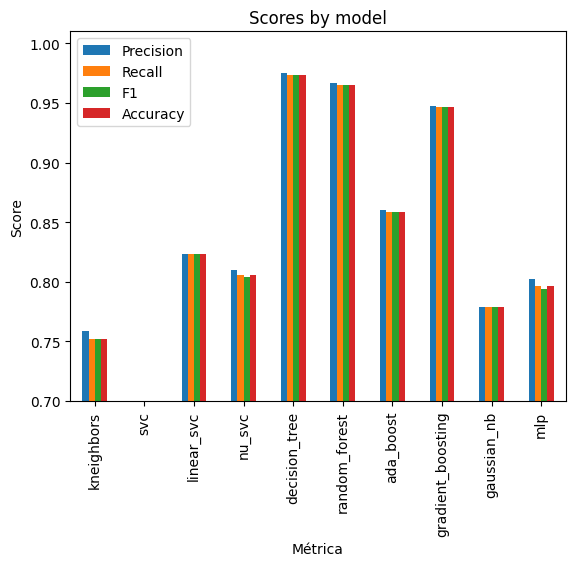

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.ylim(0.7, 1.01)
plt.title("Scores by model")
plt.show()

Comparamos las matrices de confusion del dataset Heart_Disease

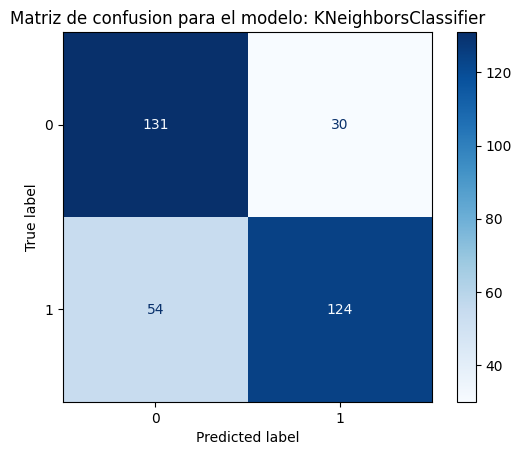

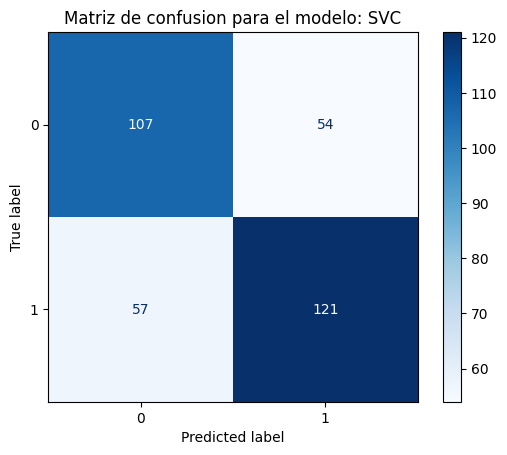

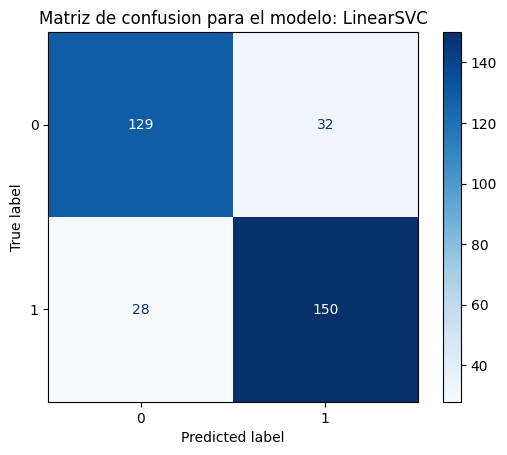

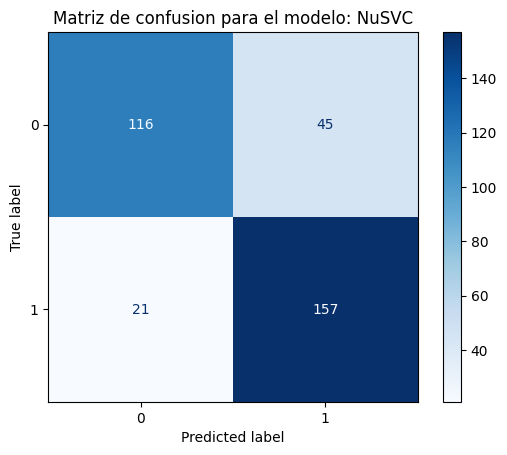

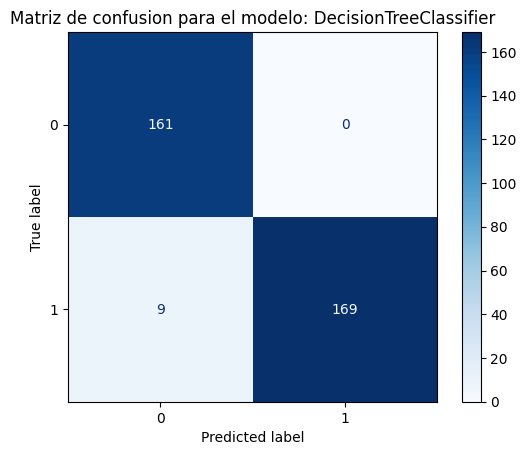

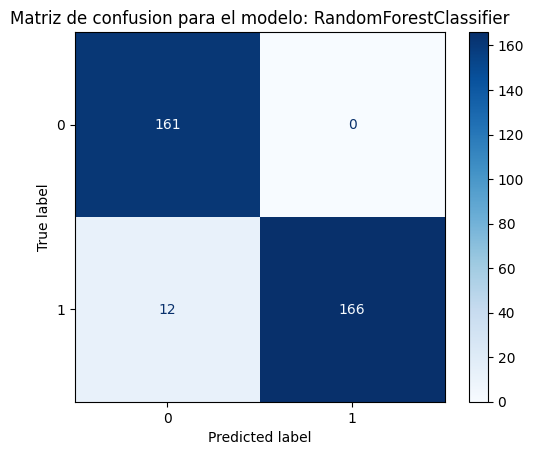

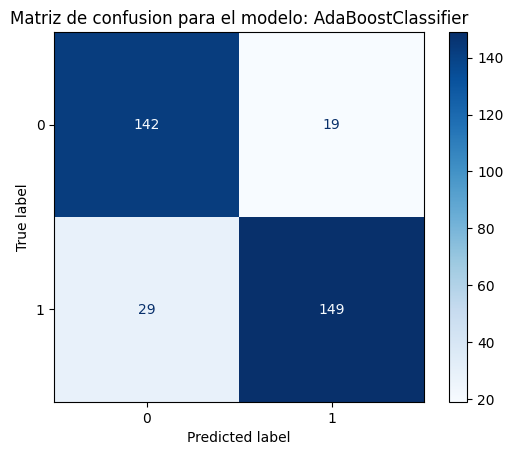

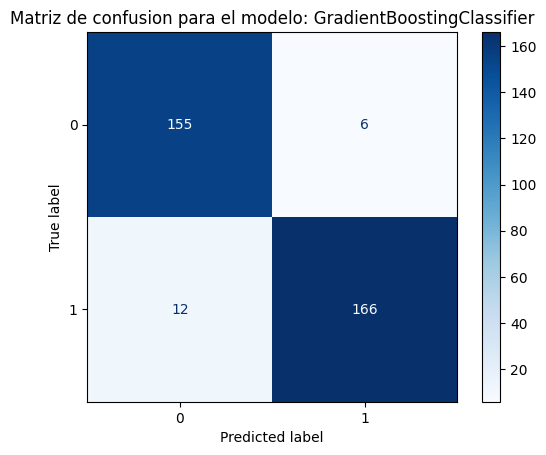

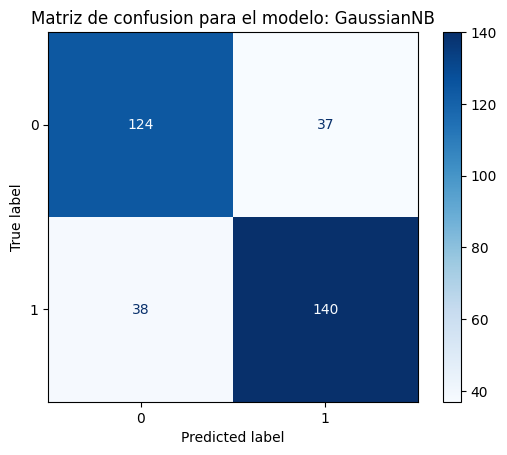

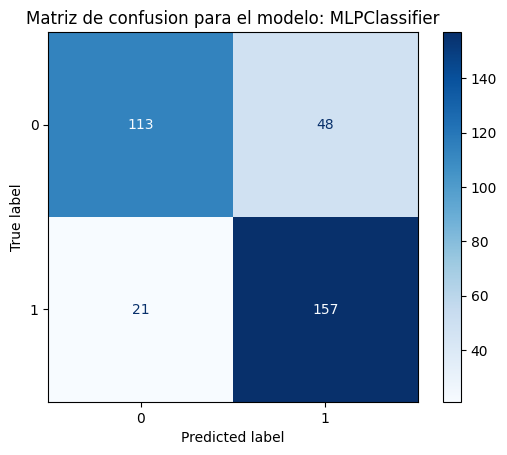

In [ ]:
plot_confusion_matrix1(matrix_heart_disease,data['target'].unique())

# Adult Census Income

In [ ]:
#Subi el archivo a drive igual para evitar tener que estarlo agregando de manera manual xd
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR_SeQ-mGxVivulS2kZiI-IAE2RsrlBjKp0gBwxsWRdUPsOyjPQZuLz1h2DzB5zwiebqGtYauNQ55dZ/pub?gid=1137038700&single=true&output=csv"

data = pd.read_csv(path)

In [ ]:
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

Solo ploteamos los primeros 3 features debido a que no se pueden representar mas dimensiones.

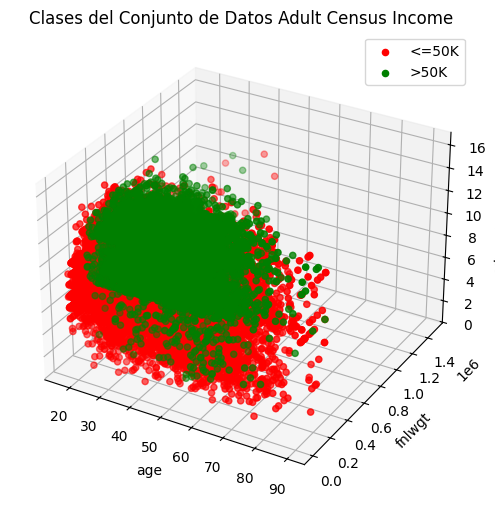

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

clases = data["income"].unique()
colores = ['r', 'g', 'b']

for i, nombre_clase in enumerate(clases):
    indices = np.where(data["income"] == nombre_clase)[0]
    ax.scatter(data.iloc[indices, 0],
               data.iloc[indices, 2],
               data.iloc[indices, 4],
               c=colores[i],
               label=nombre_clase,
               marker='o')

ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[2])
ax.set_zlabel(data.columns[4])

plt.title("Clases del Conjunto de Datos Adult Census Income")
ax.legend()
plt.show()

In [ ]:
X = pd.get_dummies(X, columns=X.select_dtypes(include='object').columns, drop_first=True)

# Split the data again after one-hot encoding
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_adult_census = []

In [ ]:
results = {}
matrix_adult_census = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
nu_svc = NuSVC(nu=0.1, random_state=RANDOM_STATE)
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)


In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_adult_census.append(cm)

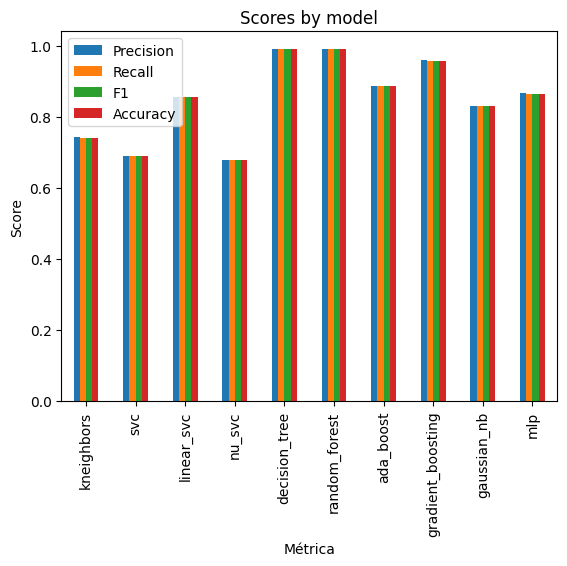

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.title("Scores by model")
plt.show()

Comparamos las matrices de confusion del dataset Adult_census_income

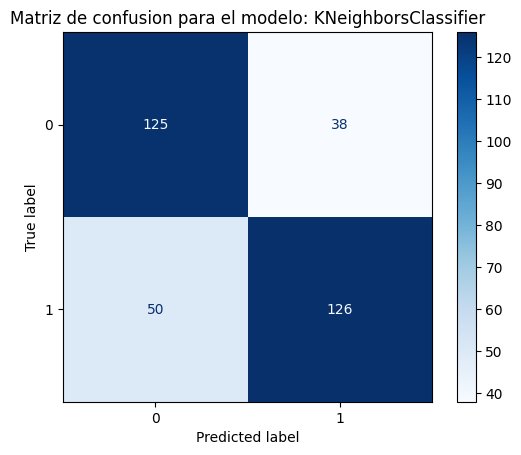

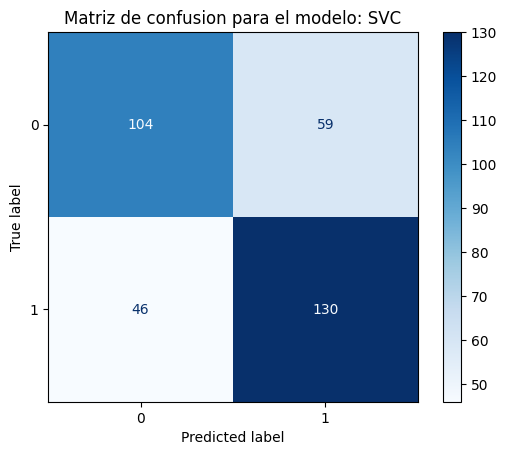

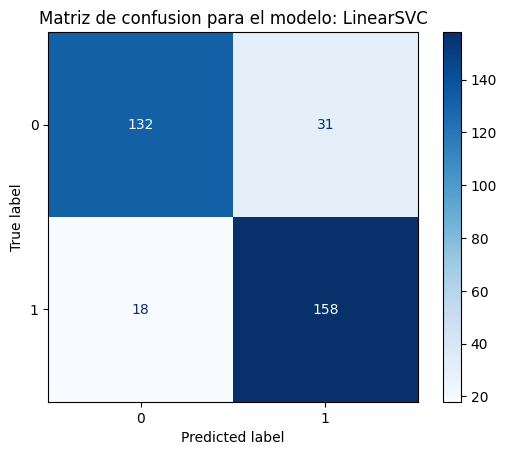

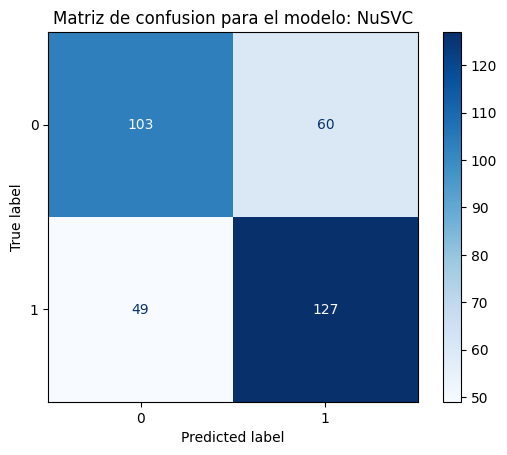

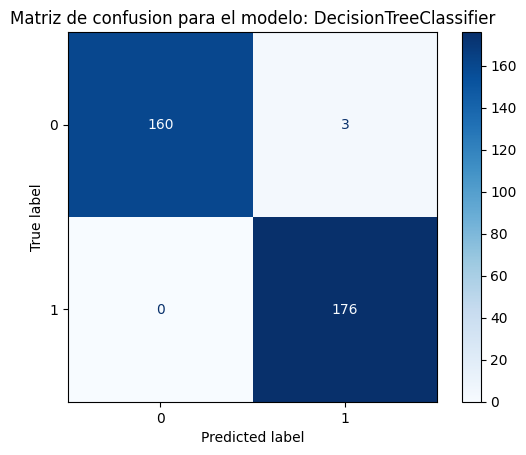

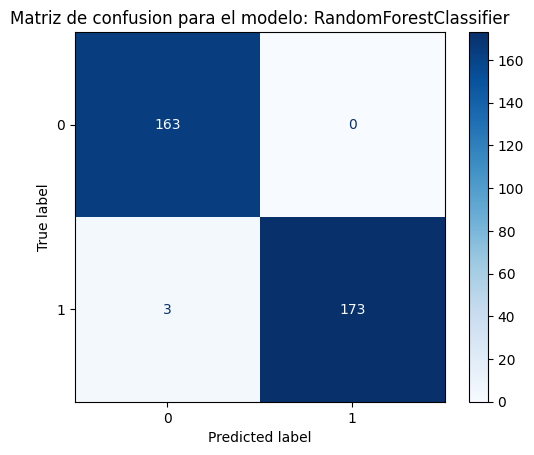

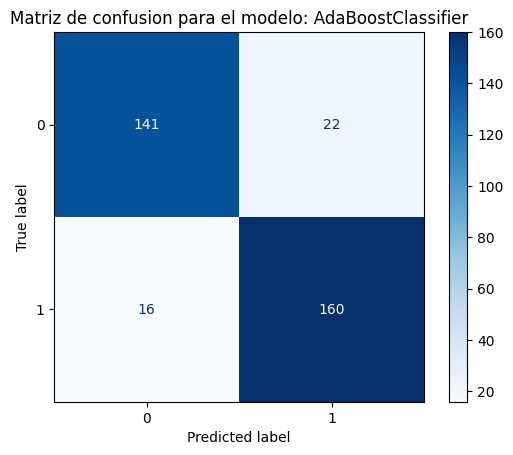

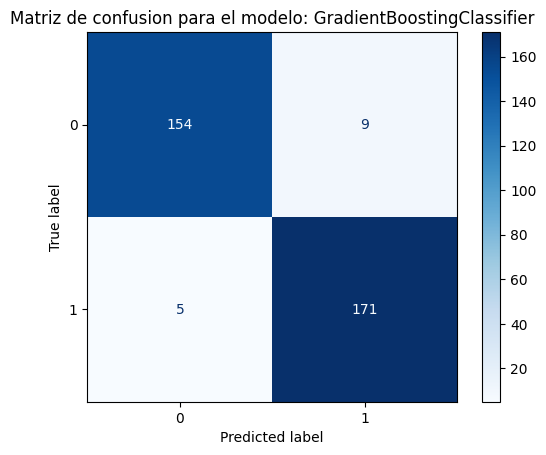

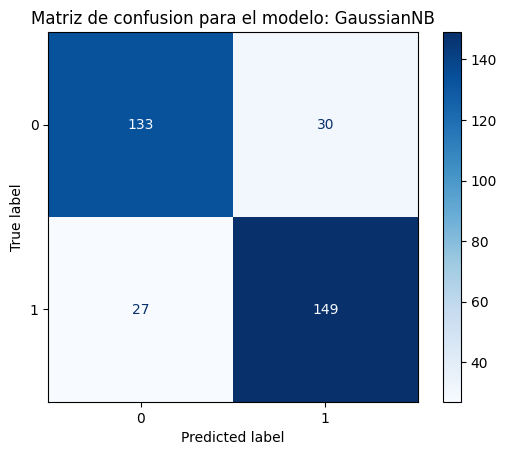

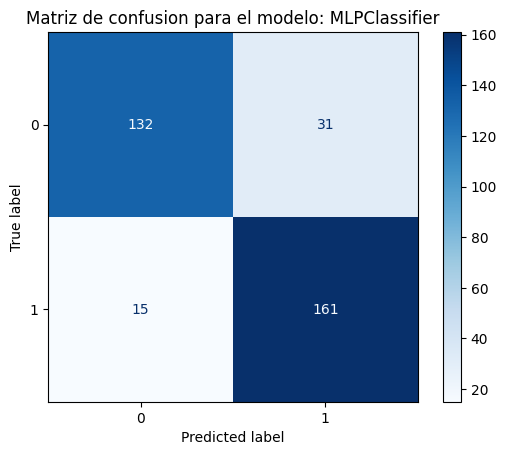

In [ ]:
plot_confusion_matrix1(matrix_adult_census,y_test.unique())

# Bank Marketing Dataset

In [ ]:
#se subio a google sheets el archivo para un mejor manejo
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS-L3WkOw0VZhdWbx9AORnfSv7Y1oQcE2XFvnkMQIZBfF8OfVVcX5KAJGBa4khLoEVTFfQXm1B91yzM/pub?gid=582355029&single=true&output=csv"
data = pd.read_csv(path)

Solo ploteamos los primeros 3 features debido a que no se pueden representar mas dimensiones.

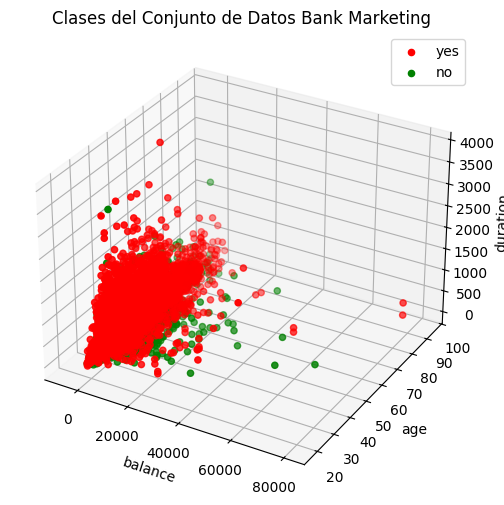

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

clases = data["deposit"].unique()
colores = ['r', 'g', 'b']

for i, nombre_clase in enumerate(clases):
    indices = np.where(data["deposit"] == nombre_clase)[0]
    ax.scatter(data.iloc[indices, 5],
               data.iloc[indices, 0],
               data.iloc[indices, 11],
               c=colores[i],
               label=nombre_clase,
               marker='o')

ax.set_xlabel(data.columns[5])
ax.set_ylabel(data.columns[0])
ax.set_zlabel(data.columns[11])

plt.title("Clases del Conjunto de Datos Bank Marketing")
ax.legend()
plt.show()

In [ ]:
data = data.dropna()
for col in data.select_dtypes(include=['object']).columns:
    if col != 'deposit':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
le_income = LabelEncoder()
data['deposit'] = le_income.fit_transform(data['deposit'])

In [ ]:
X, y = data.drop("deposit", axis=1), data["deposit"]
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_bank_marketing = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
nu_svc = NuSVC(nu=0.1, random_state=RANDOM_STATE)
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_bank_marketing.append(cm)

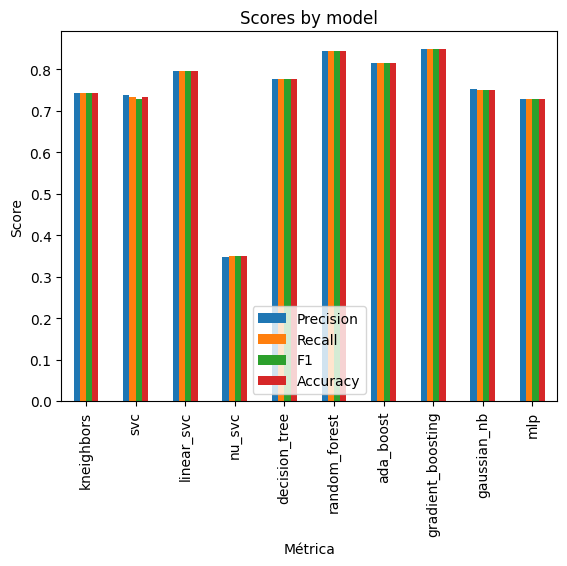

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.title("Scores by model")
plt.show()

Comparmos las matrices de confusion del dataset Bank_Marketing

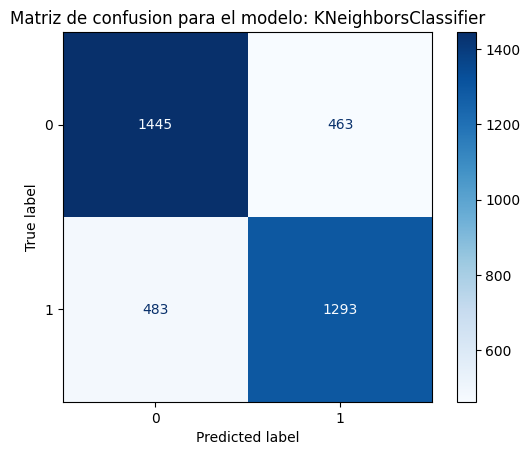

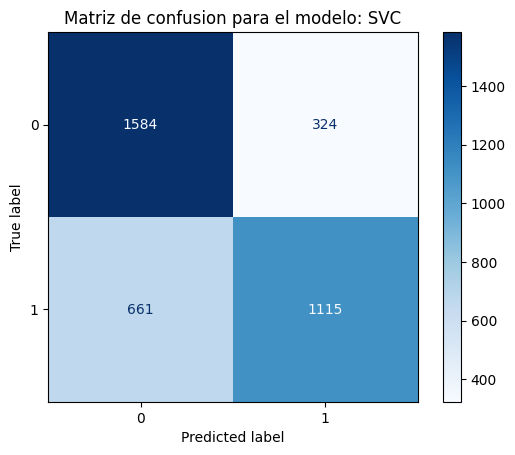

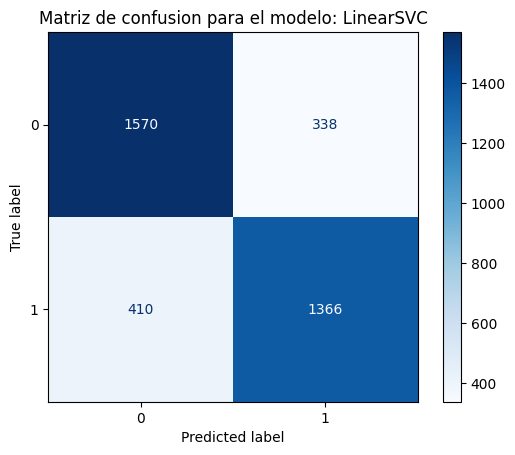

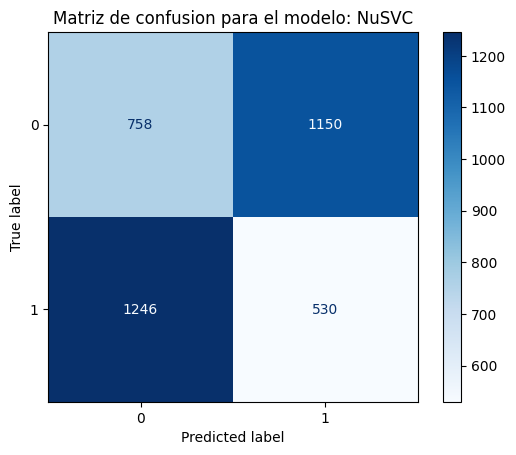

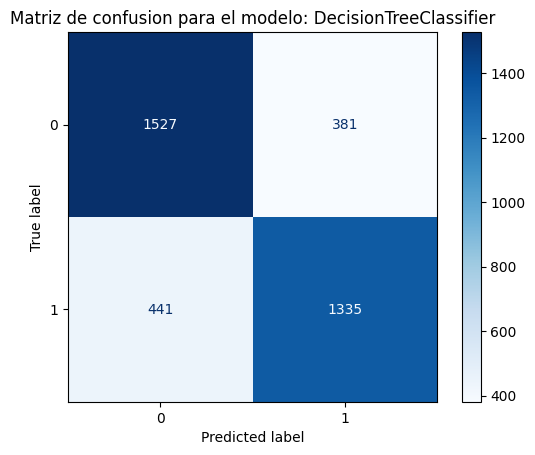

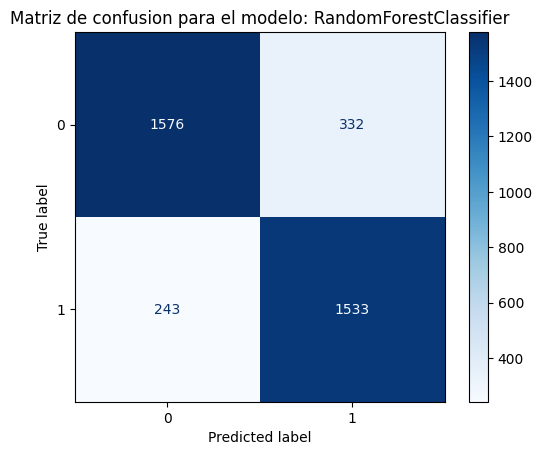

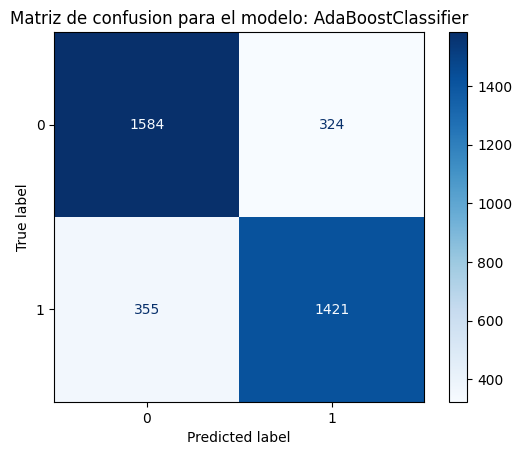

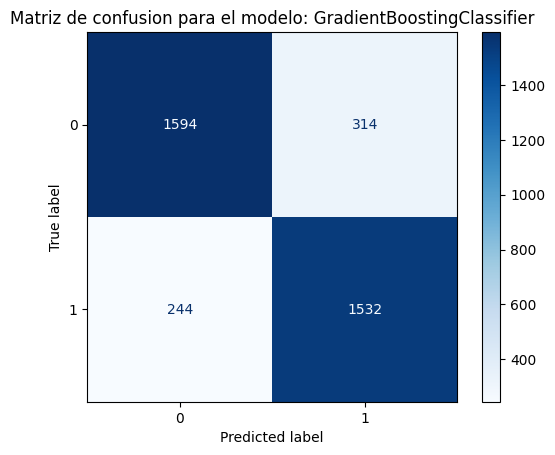

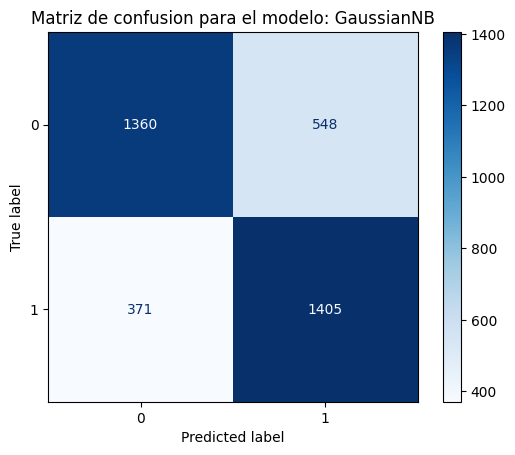

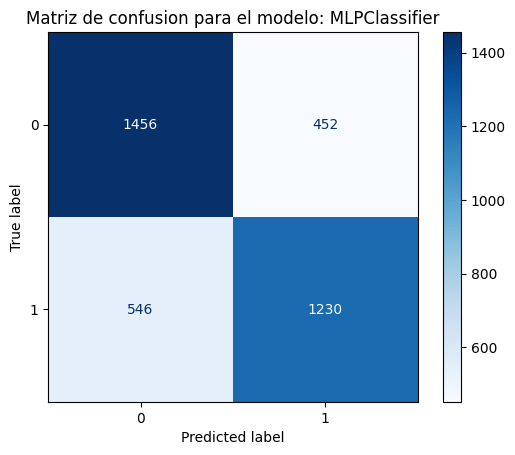

In [ ]:
plot_confusion_matrix1(matrix_bank_marketing,y_test.unique())

# Titanic Dataset

In [ ]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSVB1g3exDL38Vr696cRshWN0S4VSVQH8DnUvhF-qirhmFV8TSeueHbsM-7nsKNGc8d6rQfCl6RZQOp/pub?gid=1595571804&single=true&output=csv"
data = pd.read_csv(path)

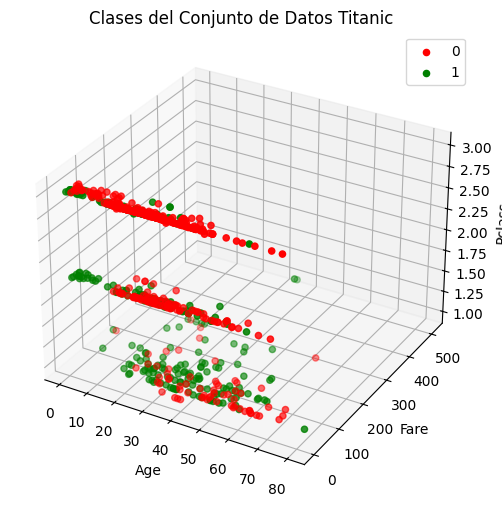

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

clases = data["Survived"].unique()
colores = ['r', 'g', 'b']

for i, nombre_clase in enumerate(clases):
    indices = np.where(data["Survived"] == nombre_clase)[0]
    ax.scatter(data.iloc[indices, 5],
               data.iloc[indices, 9],
               data.iloc[indices, 2],
               c=colores[i],
               label=nombre_clase,
               marker='o')

ax.set_xlabel(data.columns[5])
ax.set_ylabel(data.columns[9])
ax.set_zlabel(data.columns[2])

plt.title("Clases del Conjunto de Datos Titanic")
ax.legend()
plt.show()

In [ ]:
data = data.dropna()
data = data.drop("PassengerId", axis=1)
data = data.drop("Name", axis=1)
for col in data.select_dtypes(include=['object']).columns:
    if col != 'Survived':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
le_income = LabelEncoder()
data['Survived'] = le_income.fit_transform(data['Survived'])

Solo ploteamos los primeros 3 features debido a que no se pueden representar mas dimensiones.

In [ ]:
X, y = data.drop("Survived", axis=1), data["Survived"]
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
results = {}
matrix_titanic = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
nu_svc = NuSVC(nu=0.1, random_state=RANDOM_STATE)
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_titanic.append(cm)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


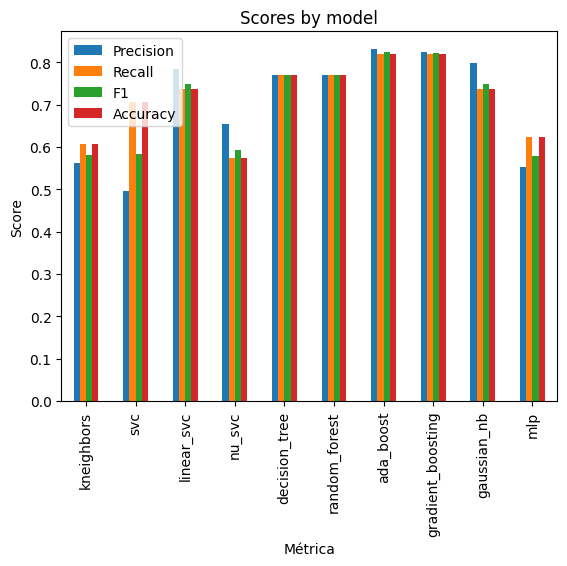

In [ ]:
metrics = ["Precision", "Recall", "F1", "Accuracy"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.title("Scores by model")
plt.show()

Se comparan las matrices de confusion del dataset de Titanic

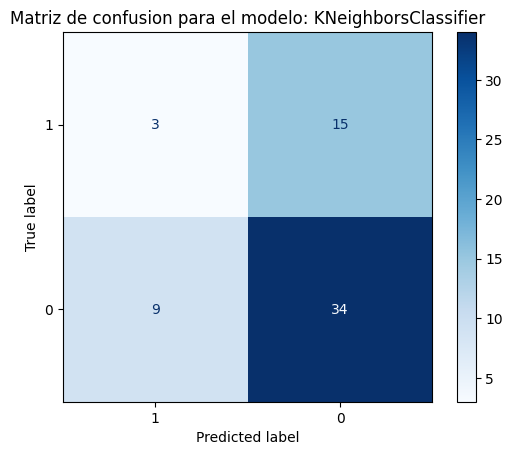

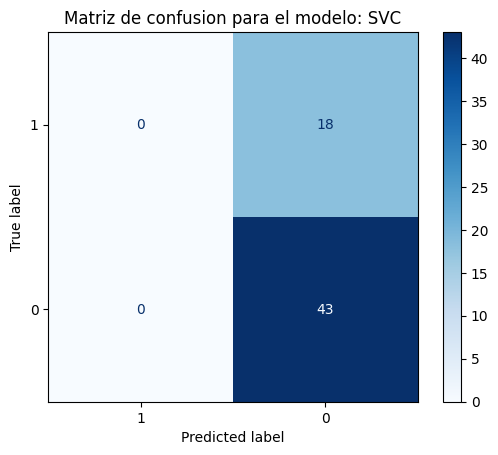

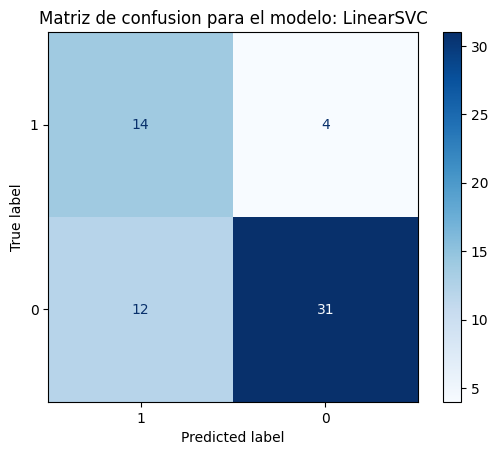

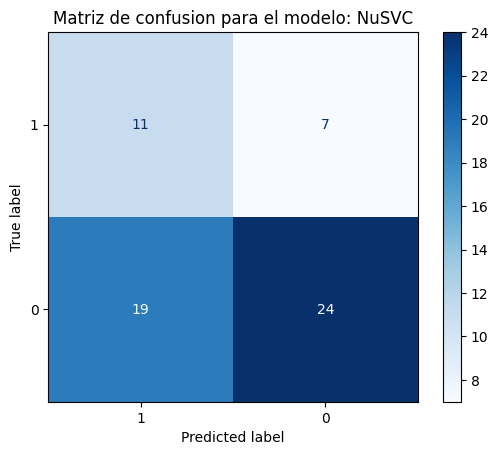

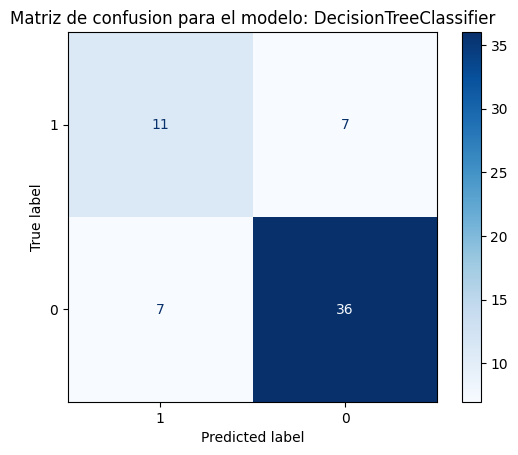

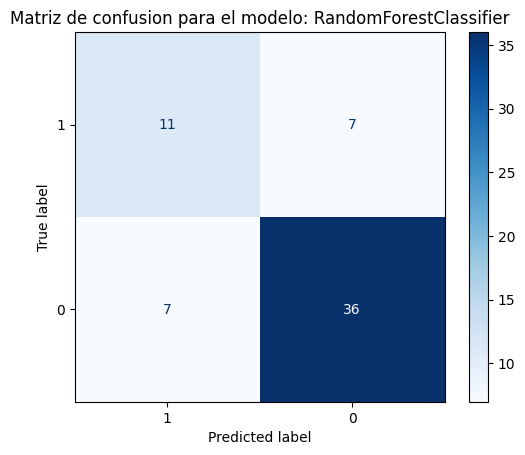

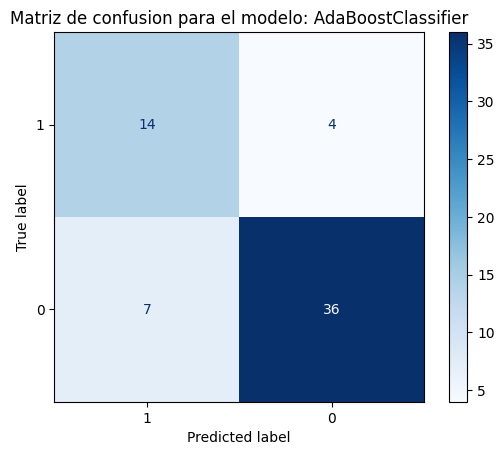

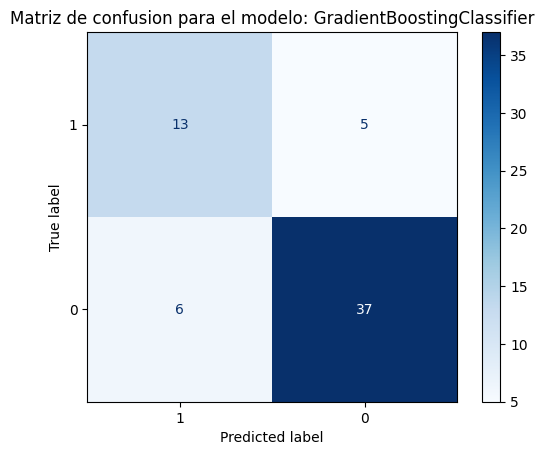

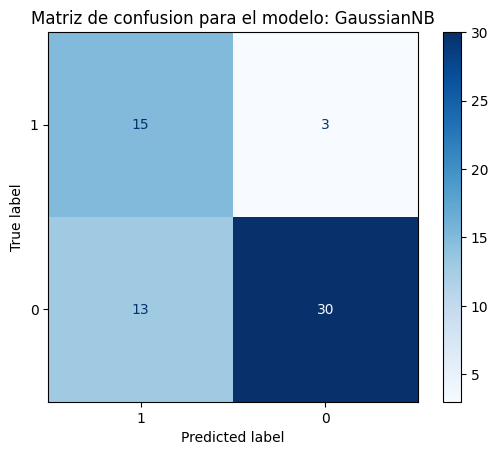

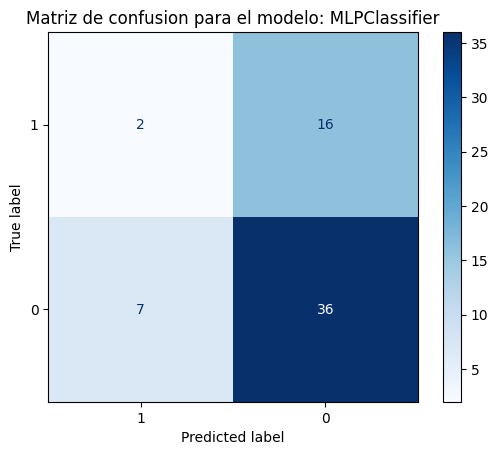

In [ ]:
plot_confusion_matrix1(matrix_titanic,y_test.unique())

# Mnist Handwritten Digits

In [ ]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
        if 'images' in filename:
            return data[16:].reshape(-1, 28, 28)
        else:
            return data[8:]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

train_images = '/content/drive/MyDrive/archive/train-images.idx3-ubyte'
train_labels = '/content/drive/MyDrive/archive/train-labels.idx1-ubyte'
test_images = '/content/drive/MyDrive/archive/t10k-images.idx3-ubyte'
test_labels = '/content/drive/MyDrive/archive/t10k-labels.idx1-ubyte'

x_train = read_idx(train_images)[:1000]
y_train = read_idx(train_labels)[:1000]
X_test = read_idx(test_images)[:200]
y_test = read_idx(test_labels)[:200]

In [ ]:
x_train.shape

(1000, 28, 28)

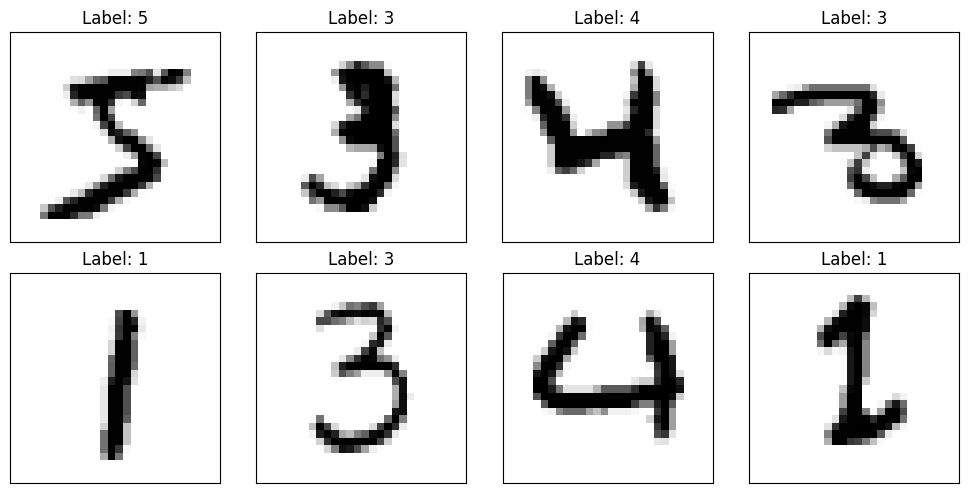

In [ ]:
indices = [0, 10, 20, 30, 40, 50, 60, 70]
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
axes = axes.ravel()

for i, ax in enumerate(axes):
    if i < len(indices):
        image = x_train[indices[i]]
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Label: {y_train[indices[i]]}')
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

In [ ]:
results = {}
matrix_handwritten = []

In [ ]:
x_train = x_train.reshape(x_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
nu_svc = NuSVC(nu=0.1, random_state=RANDOM_STATE)
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
gaussian_nb.fit(x_train, y_train)
y_pred = gaussian_nb.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_handwritten.append(cm)

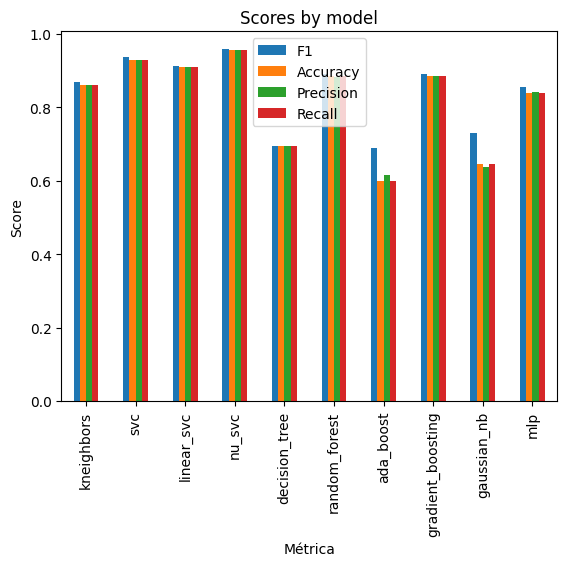

In [ ]:
metrics = ["F1","Accuracy", "Precision","Recall"]

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.title("Scores by model")
plt.show()

Se comparan las matrices de confusion del dataset Mnist Handwritten Digits

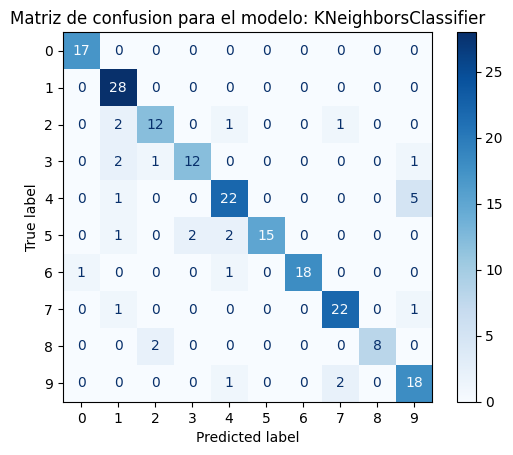

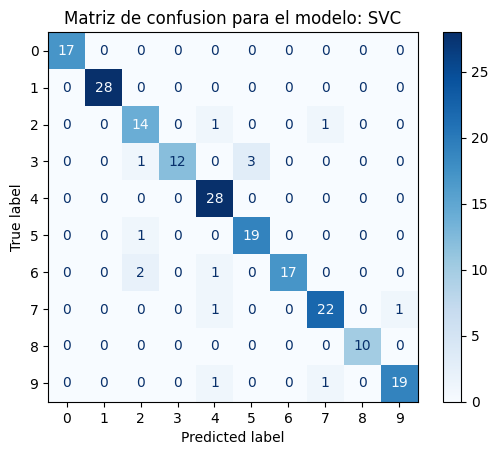

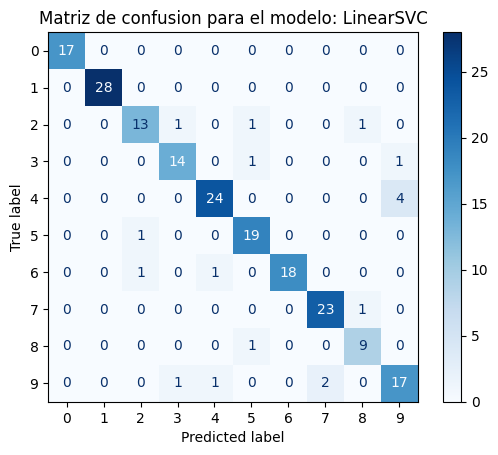

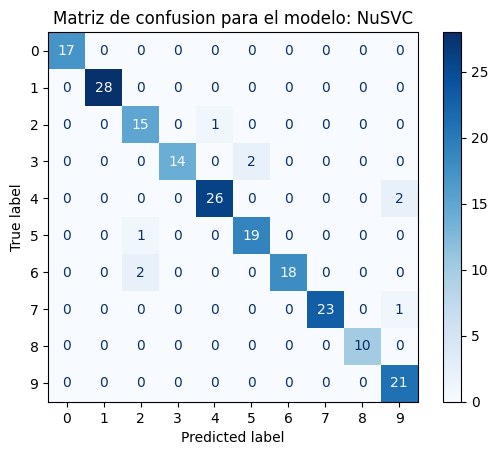

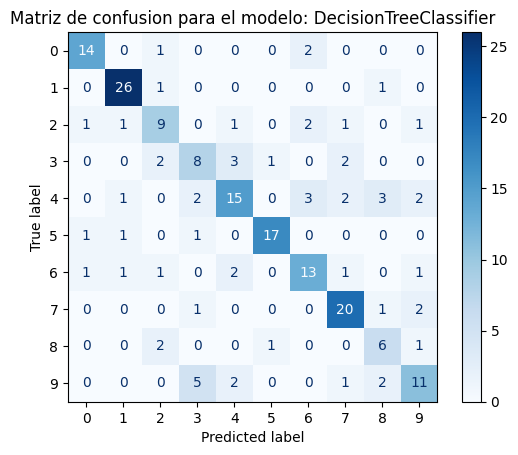

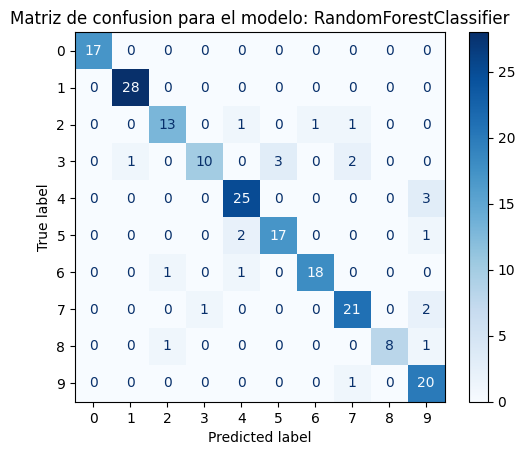

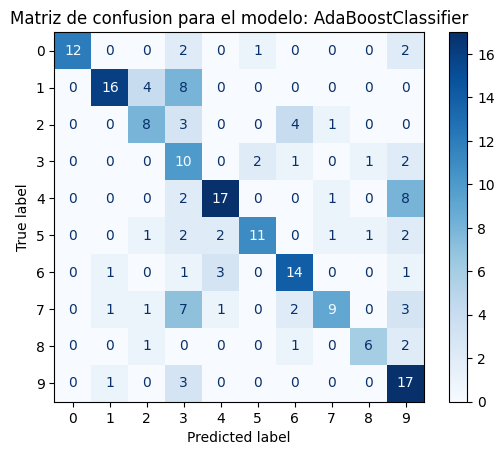

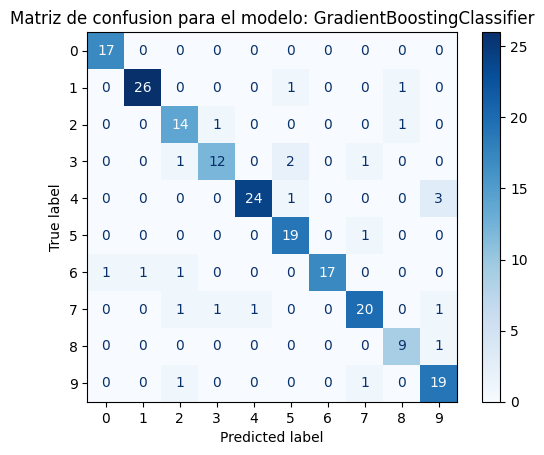

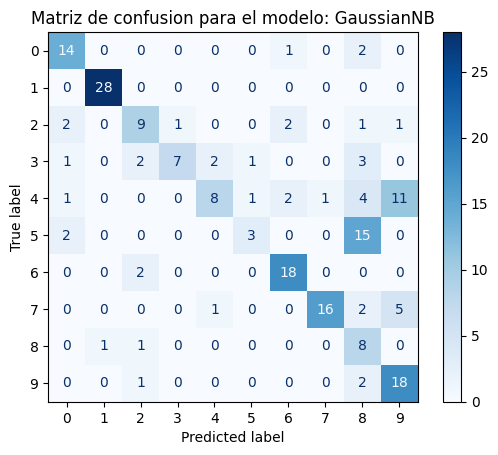

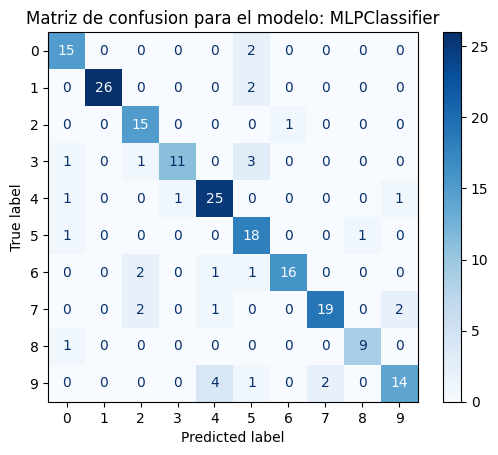

In [ ]:
plot_confusion_matrix1(matrix_handwritten, np.unique(y_test))

# Spam vs Ham Email

Funcion para limpiar la informacion


In [ ]:
def clean_text(text):
    text = text.lower() # Convertir a minúsculas
    # Eliminar puntuación usando expresión regular
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    return text


Importamos el dataset

In [ ]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTNzEBShvOPnOaW9GSVPrDA8gPg-sl6PeH1PlXvNaHFhN84mctZmDdZL4RaqEC8tweeOIJ9V5TQdhTu/pub?output=csv"
data = pd.read_csv(path)

Normalizamos la informacion

In [ ]:
data['text'] = data['text'].apply(clean_text)

X_text = data['text']
y = data['label_num']

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=5)

x_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42, stratify=y)

x_train = tfidf_vectorizer.fit_transform(x_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)

data

Unnamed: 0 label                                               text  \
0            605   ham  subject enron methanol  meter   988291\nthis i...   
1           2349   ham  subject hpl nom for january 9  2001\n see atta...   
2           3624   ham  subject neon retreat\nho ho ho  we  re around ...   
3           4685  spam  subject photoshop  windows  office  cheap  mai...   
4           2030   ham  subject re  indian springs\nthis deal is to bo...   
...          ...   ...                                                ...   
5166        1518   ham  subject put the 10 on the ft\nthe transport vo...   
5167         404   ham  subject 3  4  2000 and following noms\nhpl can...   
5168        2933   ham  subject calpine daily gas nomination\n\n\njuli...   
5169        1409   ham  subject industrial worksheets for august 2000 ...   
5170        4807  spam  subject important online banking alert\ndear v...   

      label_num  
0             0  
1             0  
2             0  
3             1  
4             0  
...         ...  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  

[5171 rows x 4 columns]

In [ ]:
results = {}
matrix_spam = []

In [ ]:
kneighbors.fit(x_train, y_train)
y_pred = kneighbors.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["kneighbors"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
svc.fit(x_train, y_train)
y_pred = svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred,output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["linear_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
nu_svc = NuSVC(nu=0.1,random_state = RANDOM_STATE)
nu_svc.fit(x_train, y_train)
y_pred = nu_svc.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["nu_svc"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)


In [ ]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["decision_tree"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["random_forest"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test,y_pred)
matrix_spam.append(cm)

In [ ]:
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred,output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["ada_boost"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
gradient_boosting.fit(x_train,y_train)
y_pred = gradient_boosting.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gradient_boosting"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
gaussian_nb.fit(x_train.toarray(),y_train)
y_pred = gaussian_nb.predict(X_test.toarray())
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["gaussian_nb"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

In [ ]:
mlp.fit(x_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, output_dict=True)
weighted_avg = report_dict["weighted avg"]
results["mlp"] = [weighted_avg["precision"], weighted_avg["recall"], weighted_avg["f1-score"], report_dict["accuracy"]]
cm = confusion_matrix(y_test, y_pred)
matrix_spam.append(cm)

Graficamos las diferencias entre cada modelo

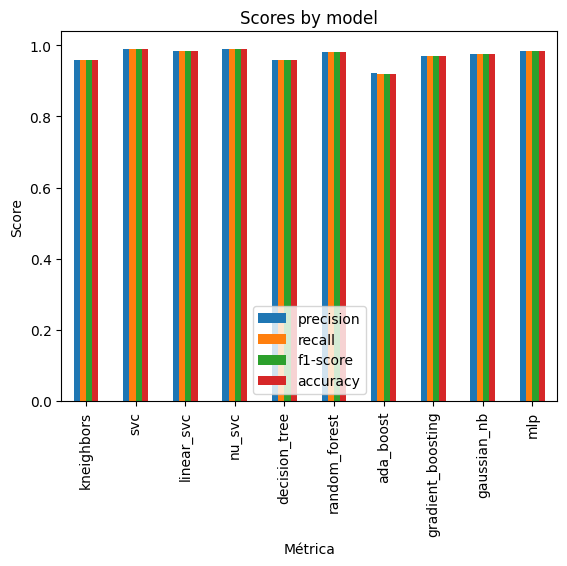

In [ ]:
metrics = ['precision','recall','f1-score','accuracy']

df = pd.DataFrame.from_dict(results, orient="index" ,columns=metrics)

df.plot(kind="bar")
plt.ylabel("Score")
plt.xlabel("Métrica")
plt.title("Scores by model")
plt.show()

Comparamos las matrices de confusion de todos los modelos

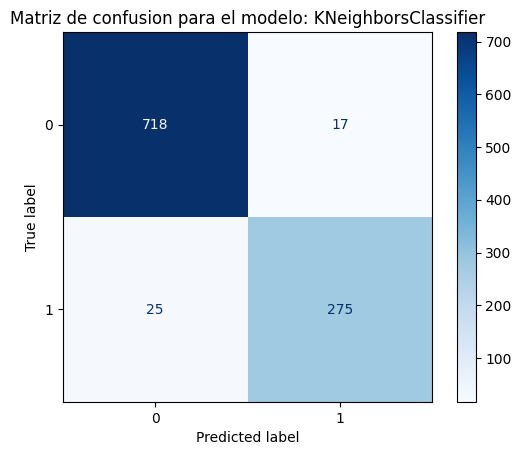

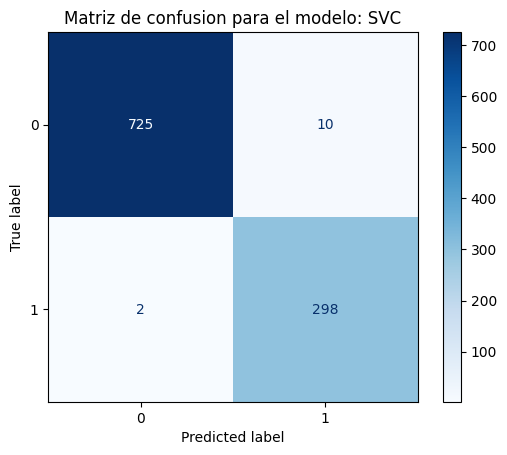

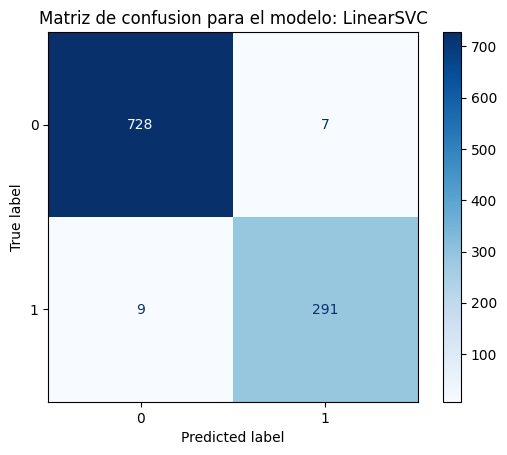

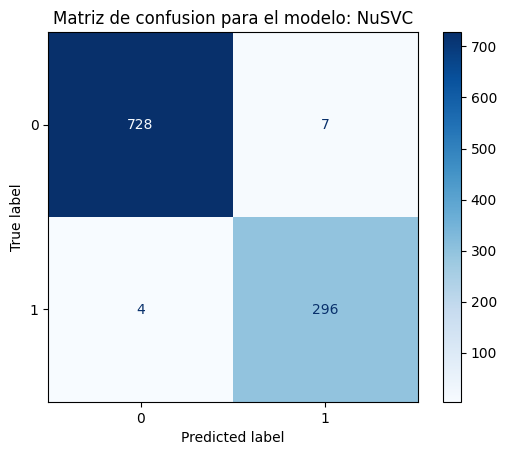

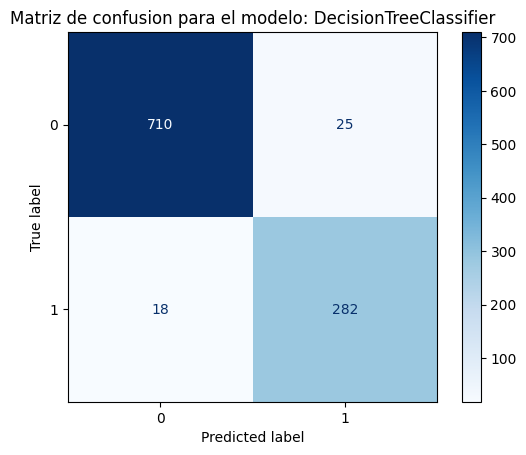

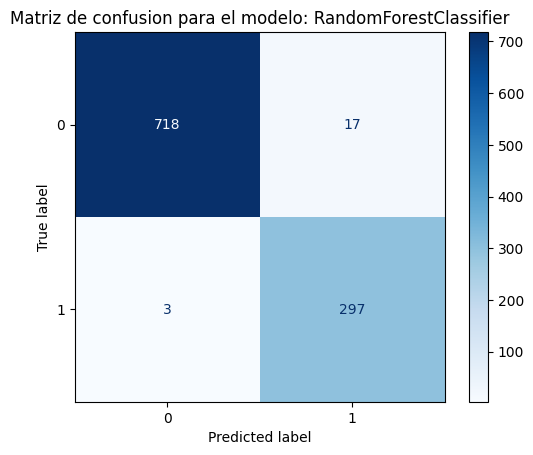

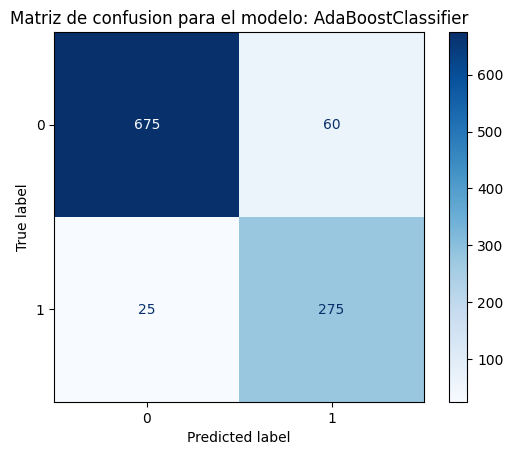

In [ ]:
plot_confusion_matrix1(matrix_spam, np.unique(y_test))
